## First, let's install FIstretch (only need to run this once)
- Make sure you replace the path (C:/Users/charl/Documents/Python%20dev/FIstretch) with the path of the folder where you downloaded FIstretch

In [1]:
# !pip install "file:C:/Users/charl/Documents/Python%20dev/FIstretch"

In [2]:
# !pip install -e "C:/Users/charl/Documents/Python dev/FIstretch"

## Next import the package

In [3]:
import FIstretch as relax
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
## Example: find the pressure at 5 km depth

target_depth = 5  
config=relax.config_crustalmodel(crust_dens_kgm3=2750)
tolerance = 0.001  # how close you want to be

# run it
pressure = relax.find_P_for_kmdepth(target_depth=5, config=config, tolerance=tolerance)
print("Pressure:", pressure)


Pressure: [1.3488749999999998]


## Example, Fig 8 from Wanamaker and Evans 1989

,Depth(km),Pinternal(MPa),dR/dt(m/s),CO2_dens_gcm3,Pexternal(MPa),Fi_radius(μm),ΔR/R0,Time (s)
0,30.000000,809.325000,0.000000e+00,0.930837,809.325000,1.000000,0.000000,0.000000
1,28.421053,799.600074,1.163351e-14,0.925726,766.728947,1.001837,0.001837,157894.736842
2,26.842105,728.515036,9.135134e-14,0.886866,724.132895,1.016261,0.016261,315789.473684
3,25.263158,716.381965,1.682210e-14,0.879949,681.536842,1.018917,0.018917,473684.210526
4,23.684211,648.525083,1.019758e-13,0.839517,638.940789,1.035018,0.035018,631578.947368


,Depth(km),Pinternal(MPa),dR/dt(m/s),CO2_dens_gcm3,Pexternal(MPa),Fi_radius(μm),ΔR/R0,Time (s)
0,30.000000,809.324997,0.000000e+00,0.927473,809.325000,1.000000,0.000000,0.000000
1,28.421053,799.782648,1.163351e-14,0.922381,766.728947,1.001837,0.001837,157894.736842
2,26.842105,729.780136,9.214946e-14,0.883333,724.132895,1.016387,0.016387,315789.473684
3,25.263158,716.817777,1.851317e-14,0.875755,681.536842,1.019310,0.019310,473684.210526
4,23.684211,649.894364,1.040974e-13,0.834720,638.940789,1.035746,0.035746,631578.947368


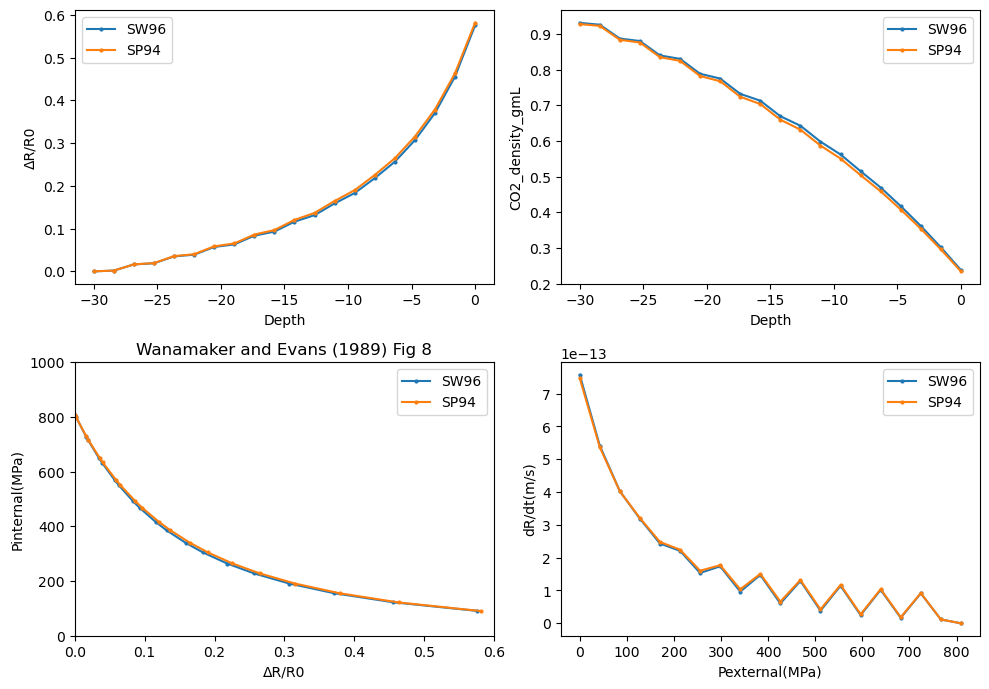

In [5]:
## Let's set the initial conditions
T = 1400 + 273.15  # Temperature in Kelvin

# Radius in m and ascent rate in m/s
R0 = 1 * 10**-6  # Initial value of R (radius of the FI in m)
b=1000*R0 # distance to the crystal edge, Wanamaker uses R0/b=1/1000
ascent_rate_ms=0.01 #m/s

depth_path_ini_fin_step=[30,0,20] #This defines the starting depth, ending depth and the number of steps in the path. 
crustal_model_config=relax.config_crustalmodel(crust_dens_kgm3=2750)#the configuration of your crustal model

EOS='SW96' # Equation of state for CO2 (SW96 or SP94)
plotfig=False # Whether to plot the figure or not
display_df=True # Whether to display the dataframe  or not

resultsSW96,_ = relax.stretch_in_ascent(R0=R0, b=b,T=T,ascent_rate_ms=ascent_rate_ms,crustal_model_config=crustal_model_config,
                                                 depth_path_ini_fin_step=depth_path_ini_fin_step,EOS='SW96',plotfig=plotfig,display_df=display_df)
resultsSP94,_ = relax.stretch_in_ascent(R0=R0, b=b,T=T,ascent_rate_ms=ascent_rate_ms,crustal_model_config=crustal_model_config,
                                                 depth_path_ini_fin_step=depth_path_ini_fin_step,EOS='SP94',plotfig=plotfig,display_df=display_df)

# NOW PLOT - This is the configuration of the plots, can modify x and y vars under 'keys', the first is x the second y

subplot_data = [
    {'data': [resultsSW96, resultsSP94], 'keys': [('Depth(km)', 'ΔR/R0')], 'xlabel': 'Depth', 'ylabel': 'ΔR/R0', 'legend': True},
    {'data': [resultsSW96, resultsSP94], 'keys': [('Depth(km)', 'CO2_dens_gcm3')], 'xlabel': 'Depth', 'ylabel': 'CO2_density_gmL', 'legend': True},
    {'data': [resultsSW96, resultsSP94], 'keys': [('ΔR/R0', 'Pinternal(MPa)')], 'xlabel': 'ΔR/R0', 'ylabel': 'Pinternal(MPa)', 'legend': True},
    {'data': [resultsSW96, resultsSP94], 'keys': [('Pexternal(MPa)', 'dR/dt(m/s)')], 'xlabel': 'Pexternal(MPa)', 'ylabel': 'dR/dt(m/s)', 'legend': True}
]

# Make plots
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs = axs.flatten()

for ax, subplot in zip(axs, subplot_data):
    for data, label in zip(subplot['data'], ['SW96', 'SP94']):
        for x_key, y_key in subplot['keys']:
            if x_key=='Depth(km)':
                ax.plot(-data[x_key], data[y_key], marker='o', markersize=2, label=label)
            else:
                ax.plot(data[x_key], data[y_key], marker='o', markersize=2, label=label)               
    ax.set_xlabel(subplot['xlabel'])
    ax.set_ylabel(subplot['ylabel'])
    if subplot.get('legend', False):
        ax.legend()
axs[2].set_title("Wanamaker and Evans (1989) Fig 8")
axs[2].set_xlim(0, 0.6)
axs[2].set_ylim(0, 1000)
plt.tight_layout()
plt.show()

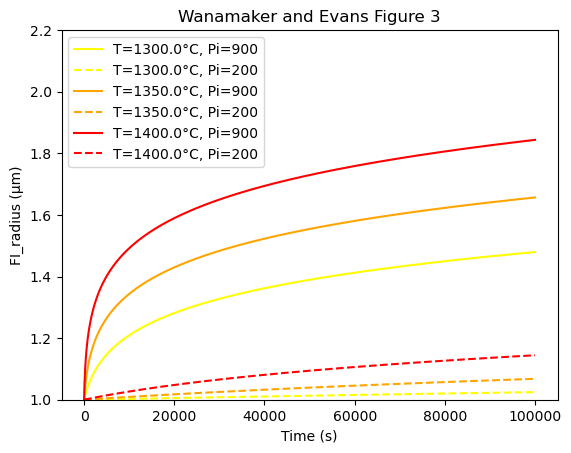

In [6]:
T_list = [1300,1350,1400]
temperatures=[t + 273.15 for t in T_list]

Pinternal_values = [900, 200]
Pexternal=0
dataframes = {}

R0 = 1.0e-6  # Initial value of R
b = R0 * 1000  # Value of b
steps = 5000  # Number of steps to iterate
totaltime = 100000

EOS='ideal'
calc_method='Euler'
plotfig=False
display_df=False

for temperature in temperatures:
    for Pinternal in Pinternal_values:
        T = temperature
        solution = relax.stretch_at_constant_Pext(R=R0, b=b, T=T, Pinternal=Pinternal, Pexternal=Pexternal, 
                                              totaltime=totaltime, steps=steps, EOS=EOS,calc_method=calc_method,
                                              display_df=display_df,plotfig=plotfig)
        key = f"T={temperature-273.15}°C, Pi={Pinternal}"
        dataframes[key] = solution[0]

        if 'T=1300' in key:
            color='yellow'
        if 'T=1350' in key:
            color='orange'
        if 'T=1400' in key:
            color='red'
        if 'Pi=900' in key:
            linestyle='-'
        if 'Pi=200' in key:
            linestyle='--'

        plt.plot(solution[0]['Time(s)'], solution[0]['Fi_radius(μm)'], label=key,color=color,linestyle=linestyle)

plt.xlabel('Time (s)')
plt.ylabel('FI_radius (μm)')
plt.title("Wanamaker and Evans Figure 3")
plt.ylim([1,2.2])
plt.legend()
plt.show()


In [1]:
import FIstretch as relax
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
###### Let's model an FI (5 um) coming from a reservoir(10kbar @ 1400 C) and erupting to surface (0.001kbar @ 1400 C) ##############

####### Establish reservoir PTX conditions

## Trapping reservoir conditions
Trapping_temp=1400
Trapping_pressure = 10

## surface conditions
Storage_temp=1400  # T in C
Storage_pressure = 0.001

####### Let's start our model

### First let's calculate the CO2 density 
fi_rho_initial_gcm3=relax.calculate_rho_for_P_T(EOS='SW96',P_kbar=Trapping_pressure,T_K=Trapping_temp+273.15)[0]

## Now we move the FI to surface
fi_Pi_storage_initial_MPa=relax.calculate_P_for_rho_T(EOS='SW96',CO2_dens_gcm3=fi_rho_initial_gcm3,T_K=Storage_temp+273.15)['P_MPa'][0]


In [11]:
## Now let's leave it on the surface for 7 days
# set initial parameters 

days=1

T = Storage_temp + 273.15
R0 = 2.5 * 10 ** -6 # FI radius in m

def calc_multiplier(R0, dist2defect_um):
    multiplier = (dist2defect_um) / (R0 * 10**6)
    return multiplier

dist2defect_list=[20,50,100,500]

b_list_R0=[calc_multiplier(R0, dist)*R0 for dist in dist2defect_list]

b0=b_list_R0[0]
b1 = b_list_R0[1]
b2=b_list_R0[2]
b3=b_list_R0[3]



steps=1000 #number of steps

EOS='SW96'
day_in_sec=(24*60*60)
totaltime=days*day_in_sec

Pinternal=fi_Pi_storage_initial_MPa
Pexternal=Storage_pressure*100 ##Pressure in MPa for this model

# Call the function with appropriate arguments
R_values = [R0]  # Define R values
b_values = [b0, b1, b2, b3]

b_list= [b0, b1, b2, b3]

results_dict_surface = relax.calculate_results(R_values, b_values, T, EOS, Pinternal, Pexternal, totaltime, steps, T4endcalc_PD=Trapping_temp,calc_method='Euler',
                                              display_df=False,plotfig=False,config=relax.config_crustalmodel(crust_dens_kgm3=2750))

results_dict_surface



2750


{'R0': {'b0':      Time(s)  Step  dt(s)  Pexternal(MPa)  Pinternal(MPa)    dR/dt(m/s)  \
  0        0.0     0    0.0             0.1     1000.000000  4.976790e-09   
  1       86.4     1   86.4             0.1      377.672244  4.976790e-09   
  2      172.8     2   86.4             0.1      372.448257  8.791200e-11   
  3      259.2     3   86.4             0.1      367.566040  8.382816e-11   
  4      345.6     4   86.4             0.1      362.987079  8.013528e-11   
  ..       ...   ...    ...             ...             ...           ...   
  995  85968.0   995   86.4             0.1      134.926594  2.700201e-12   
  996  86054.4   996   86.4             0.1      134.892352  2.697902e-12   
  997  86140.8   997   86.4             0.1      134.858152  2.695608e-12   
  998  86227.2   998   86.4             0.1      134.823994  2.693318e-12   
  999  86313.6   999   86.4             0.1      134.789878  2.691032e-12   
  
       Fi_radius(μm)  b (distance to xtal rim -μm)  \
  0    

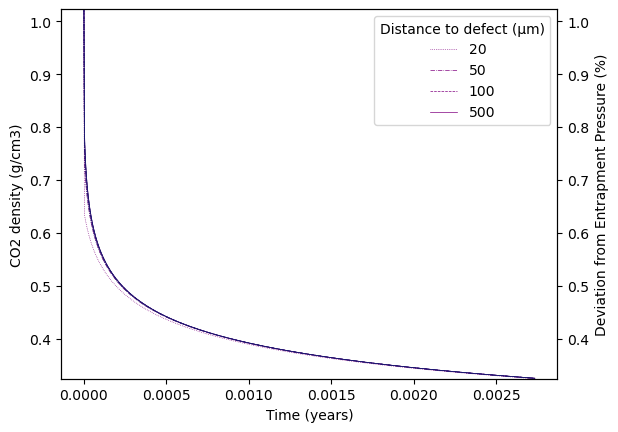

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define some constants and variables
linecolor = 'darkred'
linecolor2 = 'orange'
seconds_in_e_year = 365.25 * 24 * 60 * 60
y_col = 'CO2_dens_gcm3'
x_col = 'Time(s)'
twin_col = 'Calculated depths (km)_TrappingT'
xlabel4plot = 'Time(years)'
ylabel4plot = 'CO2 density (g/cm3)'
twinlabel4plot = 'Calculated depth (km)_TrappingT'
linecolor = 'midnightblue'
linecolor2 = 'purple'
linewidth = 0.5

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data on the primary y-axis
ax.plot(results_dict_surface['R0']['b0'][x_col] / seconds_in_e_year, results_dict_surface['R0']['b0'][y_col], color=linecolor2, linestyle=':', linewidth=linewidth, label=str(round(b0 * 10 ** 6)))
ax.plot(results_dict_surface['R0']['b1'][x_col] / seconds_in_e_year, results_dict_surface['R0']['b1'][y_col], color=linecolor2, linestyle='-.', linewidth=linewidth, label=str(round(b1 * 10 ** 6)))
ax.plot(results_dict_surface['R0']['b2'][x_col] / seconds_in_e_year, results_dict_surface['R0']['b2'][y_col], color=linecolor2, linestyle='--', linewidth=linewidth, label=str(round(b2 * 10 ** 6)))
ax.plot(results_dict_surface['R0']['b3'][x_col] / seconds_in_e_year, results_dict_surface['R0']['b3'][y_col], color=linecolor2, linestyle='-', linewidth=linewidth, label=str(round(b3 * 10 ** 6)))

# Plot the data on the secondary y-axis

ax.plot(results_dict_surface['R1']['b4'][x_col] / seconds_in_e_year, results_dict_surface['R1']['b4'][y_col], color=linecolor, linestyle=':', linewidth=linewidth)
ax.plot(results_dict_surface['R1']['b5'][x_col] / seconds_in_e_year, results_dict_surface['R1']['b5'][y_col], color=linecolor, linestyle='-.', linewidth=linewidth)
ax.plot(results_dict_surface['R1']['b6'][x_col] / seconds_in_e_year, results_dict_surface['R1']['b6'][y_col], color=linecolor, linestyle='--', linewidth=linewidth)
ax.plot(results_dict_surface['R1']['b7'][x_col] / seconds_in_e_year, results_dict_surface['R1']['b7'][y_col], color=linecolor, linestyle='-', linewidth=linewidth)

xlim_F=([round(min(results_dict_surface['R0']['b0'][x_col]/day_in_sec)),round(max(results_dict_surface['R0']['b0'][x_col]/day_in_sec))])
ymin_F=np.nanmin([np.nanmin(results_dict_surface['R0']['b0'][y_col])])

ylim_F=[ymin_F,fi_rho_initial_gcm3]

ax2 = ax.twinx()
# Set the y-axis limits for both axes
ax.set_ylim([ymin_F, fi_rho_initial_gcm3])
ax2.set_ylim([ymin_F, fi_rho_initial_gcm3])

# Customize axis labels and legends
ax.set_xlabel('Time (years)')
ax.set_ylabel(ylabel4plot)
ax2.set_ylabel('Deviation from Entrapment Pressure (%)')

ax.legend(title='Distance to defect (μm)')